In [128]:
# importing packages
import pandas as pd
import numpy as np
import plotly.express as px
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


In [129]:
# reading the data from git
df = pd.read_csv("https://raw.githubusercontent.com/ab-dum/WebScraping_Final_Project/main/raw_data.csv")

In [130]:
df

,İlan Numarası,price,location,İlan Güncelleme Tarihi,Kategorisi,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,...,Aidat,Banyo Metrekare,Balkon Metrekare,WC Metrekare,Salon Metrekare,Ada,Parsel,Pafta,Balkon Tipi Fransız Balkon,Balkon Tipi Kapalı Teras
0,14426602,"2,200,000TL",Antalya - Kepez - Yeni Emek Mahallesi,20 Aralık 2023,Satılık,100 M2,2+1,3.Kat,Klimalı,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14426397,"2,200,000TL",Antalya - Kepez - Kuzeyyaka Mahallesi,20 Aralık 2023,Satılık,95 M2,2+1,2.Kat,Klimalı,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14426356,"4,250,000TL",Antalya - Serik - Orta Mahallesi,20 Aralık 2023,Satılık,120 M2,3+1,1.Kat,Kombi Doğalgaz,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14418580,"8,750,000TL",Antalya - Muratpaşa - Şirinyalı Mahallesi,20 Aralık 2023,Satılık,150 M2,3+1,7.Kat,Kombi Doğalgaz,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14416439,"1,600,000TL",Antalya - Kepez - Teomanpaşa Mahallesi,18 Aralık 2023,Satılık,60 M2,1+1,Yüksek Giriş,Klimalı,Krediye Uygun Değil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,14423598,"1,950,000TL",Antalya - Kepez - Ayanoğlu Mahallesi,20 Aralık 2023,Satılık,60 M2,1+1,1.Kat,Klimalı,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,14423597,"1,530,000TL",Antalya - Kepez - Aydoğmuş Mahallesi,20 Aralık 2023,Satılık,70 M2,2+1,Yüksek Giriş,Isıtma Yok,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,14423596,"2,274,000TL",Antalya - Kepez - Kuzeyyaka Mahallesi,20 Aralık 2023,Satılık,125 M2,3+1,2.Kat,Klimalı,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,14423591,"2,070,000TL",Antalya - Kepez - Mehmet Akif Ersoy Mahallesi,20 Aralık 2023,Satılık,100 M2,2+1,1.Kat,Isıtma Yok,Krediye Uygun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# translating the Turkish columns to English (since there is no English version of web site)
column_name_mapping = {
    'İlan Numarası': 'Listing Number',
    'price': 'Price',
    'location': 'Location',
    'İlan Güncelleme Tarihi': 'Ad Update Date',
    'Kategorisi': 'Category',
    'Net Metrekare': 'Net Area',
    'Oda Sayısı': 'Number of Rooms',
    'Bulunduğu Kat': 'Floor',
    'Isıtma Tipi': 'Heating Type',
    'Krediye Uygunluk': 'Credit Eligibility',
    'Yapı Tipi': 'Building Type',
    'Eşya Durumu': 'Furniture Condition',
    'Banyo Sayısı': 'Number of Bathrooms',
    'Balkon Sayısı': 'Number of Balconies',
    'WC Sayısı': 'Number of WCs',
    'İlan Oluşturma Tarihi': 'Ad Creation Date',
    'Türü': 'Type',
    'Tipi': 'Category',
    'Brüt Metrekare': 'Gross Area',
    'Binanın Yaşı': 'Building Age',
    'Binanın Kat Sayısı': 'Number of Floors in Building',
    'Kullanım Durumu': 'Usage Status',
    'Yatırıma Uygunluk': 'Investment Eligibility',
    'Site İçerisinde': 'Within the Site',
    'Takas': 'Exchange',
    'Balkon Durumu': 'Balcony Condition',
    'Balkon Tipi': 'Balcony Type',
    'Fiyat Durumu': 'Price Status',
    'Tapu Durumu': 'Title Deed Status',
    'İpotek Durumu': 'Mortgage Status',
    'Kira Getirisi': 'Rental Income',
    'Yapı Durumu': 'Building Condition',
    'Zemin Etüdü': 'Soil Analysis',
    'Görüntülü Gezilebilir mi?': 'Is it Visitable Virtually?',
    'Aidat': 'Dues',
    'Banyo Metrekare': 'Bathroom Area',
    'Balkon Metrekare': 'Balcony Area',
    'WC Metrekare': 'WC Area',
    'Salon Metrekare': 'Living Room Area',
    'Ada': 'Island',
    'Parsel': 'Parcel',
    'Pafta': 'Sheet',
    'Balkon Tipi Fransız Balkon': 'Balcony Type French Balcony',
    'Balkon Tipi Kapalı Teras': 'Balcony Type Closed Terrace'
}

df.rename(columns=column_name_mapping, inplace=True)

# translating Turkish month names to English
month_mapping = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March',
    'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September',
    'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

df['Ad Update Date'] = df['Ad Update Date'].replace(month_mapping, regex=True)


# converting the 'Ad Update Date' column to datetime
df['Ad Update Date'] = pd.to_datetime(df['Ad Update Date'], format='%d %B %Y', errors='coerce')

# assigning the meanings of Turkish values to English meanings
translation_dict = {
    'Yüksek Giriş': 'High Entrance',
    'Düz Giriş (Zemin)': 'Flat Entrance (Ground)',
    'Villa Tipi': 'Villa Type',
    'Çatı Dubleks': 'Roof Duplex',
    'Bahçe Katı': 'Garden Floor',
    'Bahçe Dubleks': 'Garden Duplex',
    'Çatı Katı': 'Roof Floor',
    'Betonarme': 'Reinforced Concrete',
    'Ahşap': 'Wooden',
    'Çelik': 'Steel',
    'Eşyalı': 'Furnished',
    'Boş': 'Empty',
    'Klimalı': 'Air-conditioned',
    'Kombi Doğalgaz': 'Combination Natural Gas Heater',
    'Yerden Isıtma': 'Underfloor Heating',
    'Merkezi (Pay Ölçer)': 'Central (Submeter)',
    'Şömine': 'Fireplace',
    'Isıtma Yok': 'No Heating',
    'Sobalı': 'Stove-heated',
    'Merkezi Doğalgaz': 'Central Natural Gas',
    'Kat Kaloriferi': 'Floor Heating',
    'Doğalgaz Sobalı': 'Natural Gas Stove',
    'Güneş Enerjisi': 'Solar Energy',
    'Krediye Uygun': 'Eligible for Credit',
    'Krediye Uygun Değil': 'Not Eligible for Credit',
    'Bilinmiyor': 'Unknown',
    'Boş': 'Empty',
    'Kiracı Oturuyor': 'Tenant Occupied',
    'Mülk Sahibi Oturuyor': 'Owner Occupied',
    'Yatırıma Uygun': 'Suitable for Investment'
}

# extracting numeric floor information from the 'Floor' column
df['Floor'] = df['Floor'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else 'Unknown')

# translating Turkish expressions into English in the specified columns
columns_to_translate = ['Heating Type', 'Credit Eligibility', 'Building Type',
                        'Furniture Condition', 'Usage Status', 'Investment Eligibility']

for column in columns_to_translate:
    df[column] = df[column].map(translation_dict)

df

,Listing Number,Price,Location,Ad Update Date,Category,Net Area,Number of Rooms,Floor,Heating Type,Credit Eligibility,...,Dues,Bathroom Area,Balcony Area,WC Area,Living Room Area,Island,Parcel,Sheet,Balcony Type French Balcony,Balcony Type Closed Terrace
0,14426602,"2,200,000TL",Antalya - Kepez - Yeni Emek Mahallesi,2023-12-20,Satılık,100 M2,2+1,3,Air-conditioned,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14426397,"2,200,000TL",Antalya - Kepez - Kuzeyyaka Mahallesi,2023-12-20,Satılık,95 M2,2+1,2,Air-conditioned,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14426356,"4,250,000TL",Antalya - Serik - Orta Mahallesi,2023-12-20,Satılık,120 M2,3+1,1,Combination Natural Gas Heater,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14418580,"8,750,000TL",Antalya - Muratpaşa - Şirinyalı Mahallesi,2023-12-20,Satılık,150 M2,3+1,7,Combination Natural Gas Heater,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14416439,"1,600,000TL",Antalya - Kepez - Teomanpaşa Mahallesi,2023-12-18,Satılık,60 M2,1+1,Unknown,Air-conditioned,Not Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,14423598,"1,950,000TL",Antalya - Kepez - Ayanoğlu Mahallesi,2023-12-20,Satılık,60 M2,1+1,1,Air-conditioned,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,14423597,"1,530,000TL",Antalya - Kepez - Aydoğmuş Mahallesi,2023-12-20,Satılık,70 M2,2+1,Unknown,No Heating,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,14423596,"2,274,000TL",Antalya - Kepez - Kuzeyyaka Mahallesi,2023-12-20,Satılık,125 M2,3+1,2,Air-conditioned,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,14423591,"2,070,000TL",Antalya - Kepez - Mehmet Akif Ersoy Mahallesi,2023-12-20,Satılık,100 M2,2+1,1,No Heating,Eligible for Credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.columns

Index(['Listing Number', 'Price', 'Location', 'Ad Update Date', 'Category',
       'Net Area', 'Number of Rooms', 'Floor', 'Heating Type',
       'Credit Eligibility', 'Building Type', 'Furniture Condition',
       'Number of Bathrooms', 'Number of Balconies', 'Number of WCs',
       'Ad Creation Date', 'Type', 'Category', 'Gross Area', 'Building Age',
       'Number of Floors in Building', 'Usage Status',
       'Investment Eligibility', 'Within the Site', 'Exchange',
       'Balcony Condition', 'Balcony Type', 'Price Status',
       'Title Deed Status', 'Mortgage Status', 'Rental Income',
       'Building Condition', 'Soil Analysis', 'Is it Visitable Virtually?',
       'Dues', 'Bathroom Area', 'Balcony Area', 'WC Area', 'Living Room Area',
       'Island', 'Parcel', 'Sheet', 'Balcony Type French Balcony',
       'Balcony Type Closed Terrace'],
      dtype='object')

In [133]:
# extracting just the Districts from the Location column (extracting the value in the middle)
df['District'] = df['Location'].str.split('-').str[1].str.strip()

# choosing the columns we are interested in
selected_columns = ['Listing Number', 'District', 'Price', 'Ad Update Date', 'Net Area', 'Number of Rooms',
                    'Floor', 'Heating Type', 'Credit Eligibility', 'Building Type', 'Furniture Condition',
                     'Number of Bathrooms', 'Number of Balconies', 'Number of WCs','Building Age',
                     'Number of Floors in Building', 'Usage Status',
                     'Investment Eligibility']


# assigning the selected columns
df = df[selected_columns]

# showing the updated DataFrame
df


,Listing Number,District,Price,Ad Update Date,Net Area,Number of Rooms,Floor,Heating Type,Credit Eligibility,Building Type,Furniture Condition,Number of Bathrooms,Number of Balconies,Number of WCs,Building Age,Number of Floors in Building,Usage Status,Investment Eligibility
0,14426602,Kepez,"2,200,000TL",2023-12-20,100 M2,2+1,3,Air-conditioned,Eligible for Credit,Reinforced Concrete,Furnished,1,2,1.0,11-15,3,Empty,Suitable for Investment
1,14426397,Kepez,"2,200,000TL",2023-12-20,95 M2,2+1,2,Air-conditioned,Eligible for Credit,Reinforced Concrete,Empty,1,1,1.0,11-15,3,Tenant Occupied,Suitable for Investment
2,14426356,Serik,"4,250,000TL",2023-12-20,120 M2,3+1,1,Combination Natural Gas Heater,Eligible for Credit,NaN,Empty,2,2,2.0,0 (Yeni),5,Empty,NaN
3,14418580,Muratpaşa,"8,750,000TL",2023-12-20,150 M2,3+1,7,Combination Natural Gas Heater,Eligible for Credit,Reinforced Concrete,Empty,1,2,2.0,16-20,12,Empty,Suitable for Investment
4,14416439,Kepez,"1,600,000TL",2023-12-18,60 M2,1+1,Unknown,Air-conditioned,Not Eligible for Credit,NaN,Empty,1,NaN,NaN,0 (Yeni),3,Empty,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,14423598,Kepez,"1,950,000TL",2023-12-20,60 M2,1+1,1,Air-conditioned,Eligible for Credit,NaN,Empty,1,NaN,NaN,0 (Yeni),5,Empty,Unknown
416,14423597,Kepez,"1,530,000TL",2023-12-20,70 M2,2+1,Unknown,No Heating,Eligible for Credit,NaN,Empty,1,NaN,NaN,1,2,Owner Occupied,Unknown
417,14423596,Kepez,"2,274,000TL",2023-12-20,125 M2,3+1,2,Air-conditioned,Eligible for Credit,NaN,Empty,1,NaN,NaN,5-10,3,Owner Occupied,Unknown
418,14423591,Kepez,"2,070,000TL",2023-12-20,100 M2,2+1,1,No Heating,Eligible for Credit,NaN,Empty,1,NaN,NaN,5-10,3,Owner Occupied,Unknown


In [134]:
# removing non-numeric characters from 'Price' and 'Net Area' columns using .loc
df.loc[:, 'Price'] = df['Price'].replace('[\D]', '', regex=True).astype(float)
df.loc[:, 'Net Area'] = df['Net Area'].replace('[\D]', '', regex=True).astype(float)

# calculating price per square meter
df["Price per m2"] = df["Price"] / df["Net Area"]

# group by District and calculate average price per square meter
avg_price_per_m2 = df.groupby("District")["Price per m2"].mean()

# displaying average price per square meter for each District
print(avg_price_per_m2)


District
Aksu           7490.581496
Alanya        19444.622383
Döşemealtı    11269.007853
Finike         3412.108228
Gazipaşa       3762.700738
Kaş            9276.206688
Kemer          8543.477838
Kepez          3905.887889
Konyaaltı      4559.680726
Kumluca        2754.266895
Manavgat      19406.231761
Muratpaşa     10752.988253
Serik         35828.294703
Name: Price per m2, dtype: object


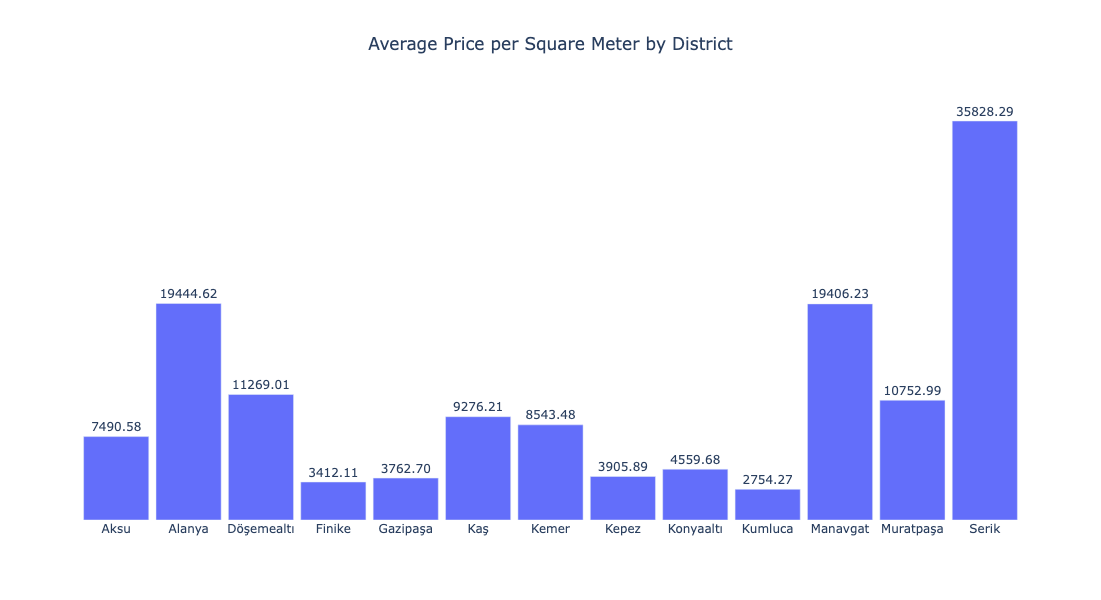

In [135]:
# converting the result to a DataFrame for Plotly Express
df_avg_price = avg_price_per_m2.reset_index(name='Average Price per m2')

# plotting by using Plotly Express
fig = px.bar(df_avg_price, x='District', y='Average Price per m2',
             title='Average Price per Square Meter by District',
             labels={'Average Price per m2': 'Average Price per m2'},
             height=600, width=1000)  

# customizing the appearance
fig.update_layout(
    xaxis_title='',  # removing x-axis title
    yaxis_title='',  # removing y-axis title
    title_x=0.5,  # center the title
    plot_bgcolor='white',  # setting background color to white
)

# removing y-axis ticks and labels
fig.update_yaxes(ticks='', showticklabels=False)

# showing the values on top of the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# center the plot
fig.update_layout(bargap=0.1)  

# showing the plot
fig.show()

* As can be seen in this plot, Serik, Alanya and Manavgat districts are the districts with the highest prices per m2, respectively. Kumluca, Finike and Gazipaşa districts are seen as the districts with the lowest m2 price.

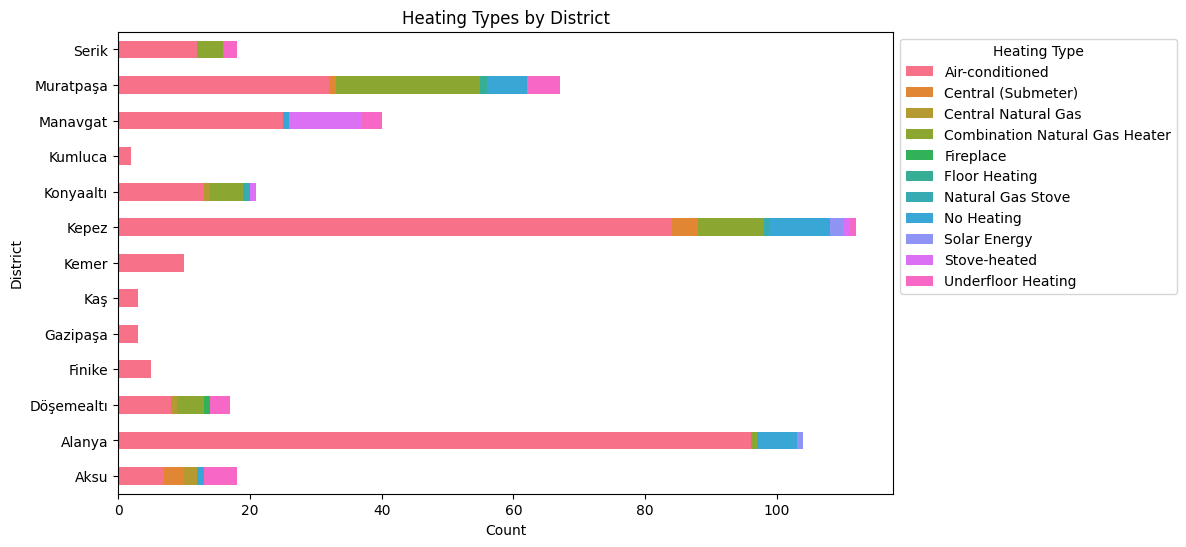

In [136]:
# filling out the null values with "Unkown"
df["Heating Type"] = df["Heating Type"].fillna("Unknown")

# group by district according to their heating type
heating_counts = df.groupby(["District", "Heating Type"]).size().unstack()

# creating color palette by using Seaborn
colors = sns.color_palette("husl", n_colors=len(heating_counts.columns))

# creating clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
heating_counts.plot(kind='barh', stacked=True, ax=ax, color=colors)
ax.set_xlabel('Count')
ax.set_ylabel('District')
ax.set_title('Heating Types by District')
ax.legend(title='Heating Type', bbox_to_anchor=(1, 1))
#showing the chart
plt.show()

* As can be seen from the figure, the most used heating type in all districts of Antalya is air conditioner. It is followed by combitaniton natural gas heater. In addition, although Antalya is a region that receives a lot of sun, it is noteworthy that the rate of solar energy used in homes is lower than other types of heating.

In [137]:
# converting the "Floor" column to numeric format
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')

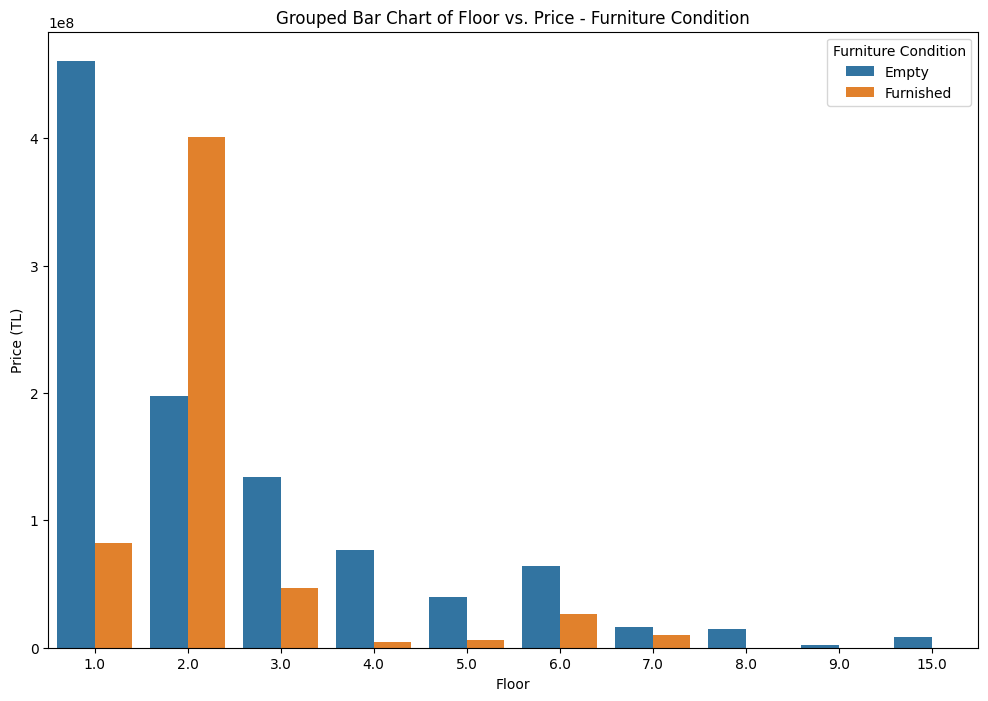

In [138]:
# creating grouped bar chart by using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="Floor", y="Price", hue="Furniture Condition", estimator=sum, ci=None)

# customizing the chart
plt.xlabel('Floor')
plt.ylabel('Price (TL)')
plt.title('Grouped Bar Chart of Floor vs. Price - Furniture Condition')
plt.legend(title='Furniture Condition')

# showing the chart
plt.show()

- From this graph, it can be said that the prices of the furnished houses on the 1st floor and the furnished houses on the 2nd floor are higher than the others. It can also be clearly seen that the price decreases as the number of floors increases.